In [1]:
import sys; sys.path.append(_dh[0].split("knowknow")[0])
from knowknow import *

In [2]:
database_name = "wos"

# citations

In [3]:
cits = get_cnt("%s.ind"%database_name, ['cy','fy'])
cysum = load_variable("%s.cysum"%database_name)

Loaded keys: dict_keys(['cy', 'fy'])
Available keys: ['fj', 'fy', 'ty', 'fy.ty', 'fj.ty', 'jy', 'a', 'ay', 'aj', 'ajy', 'ac', 'c', 'cy', 'cj', 'cjy']


In [4]:
deathks = ["death1","death2","death3"]

In [5]:
from random import shuffle
# get a BigGuy
thresh = np.quantile([x['total'] for x in cysum.values()], 0.95)
bgs = [
    x for x in cysum.values() 
    if x['total'] > thresh and 
        all(x[deathk] is not None
            for deathk in deathks)
]
shuffle(bgs)

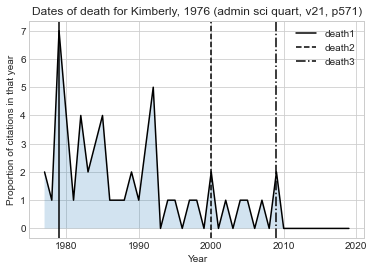

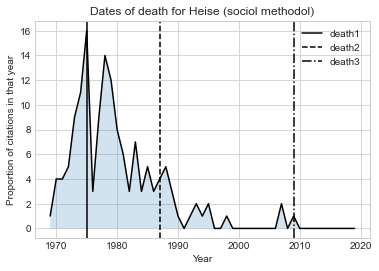

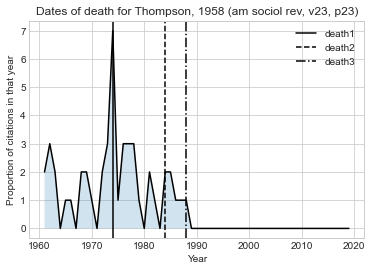

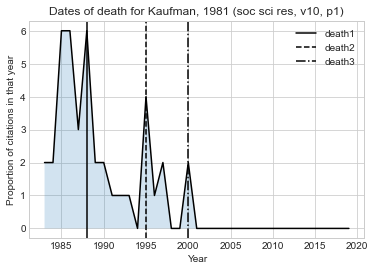

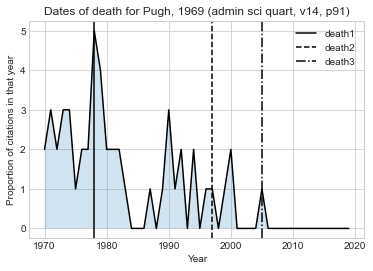

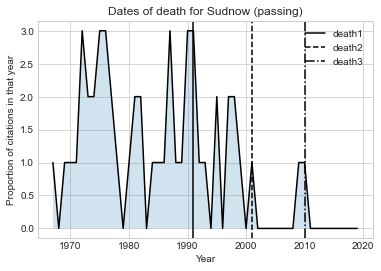

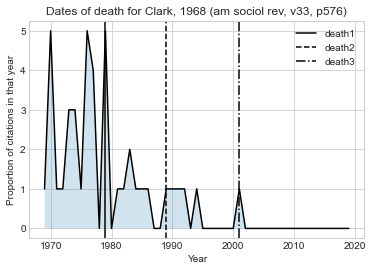

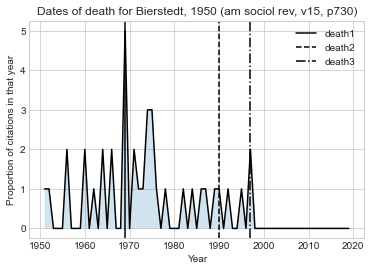

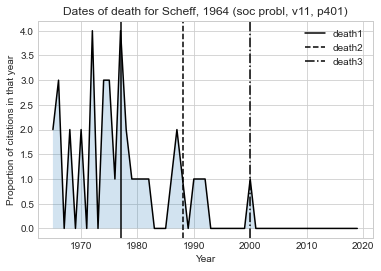

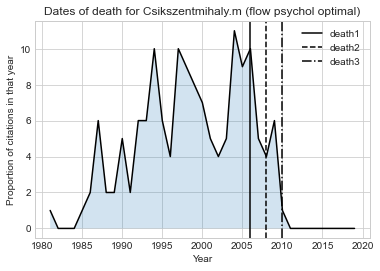

In [6]:
def fix_name(x):
    sp = x.split("|")
    n, y = sp[:-1], sp[-1].strip()
    n = ", ".join( x[0].upper() + x[1:] for x in n )
    return "%s (%s)" % (n,y)

from random import random as rnd

linestyles = ['-', '--', '-.', ':']

for bg in bgs[:10]:
    
    years = range(bg['first'], 2020)
    prop_trend = [ cits['cy'][(bg['name'],y)] / cits['fy'][y] for y in years ]
    count_trend = [ cits['cy'][(bg['name'],y)] for y in years ]
    plt.plot(
        years,
        count_trend,
        color='black'
    )
    plt.fill_between(
        years,
        [ 0 for y in years ],
        count_trend,
        alpha=0.2
    )

    for i,deathk in enumerate(deathks):
        plt.axvline(bg[deathk], 0, 10, label=deathk, color="black", linestyle=linestyles[i])

    plt.title("Dates of death for %s" % fix_name(bg['name']))

    plt.legend();
    plt.xlabel("Year")
    plt.ylabel("Proportion of citations in that year")
    
    save_figure("%s.cysum_example_citationdeath" % database_name)
    plt.show();

# authors

In [7]:
aysum = load_variable("%s.aysum" % database_name)
docs = get_cnt("%s.doc"%database_name, ['ay'])

Loaded keys: dict_keys(['ay'])
Available keys: ['fj', 'fy', 'ty', 'fy.ty', 'fj.ty', 'jy', 'a', 'ay', 'aj', 'ajy', 'ac', 'c', 'cy', 'cj', 'cjy']


In [8]:
deathks = ["death%s"%x for x in range(1,4)]

In [9]:
from random import shuffle
# get a BigGuy
thresh = np.quantile([x['total'] for x in aysum.values()], 0.95)
bgs = [
    x for x in aysum.values() 
    if x['total'] > thresh and 
        all(x[deathk] is not None 
    for deathk in deathks)
]
shuffle(bgs)

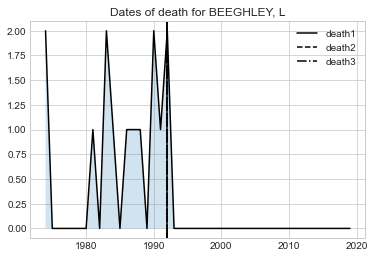

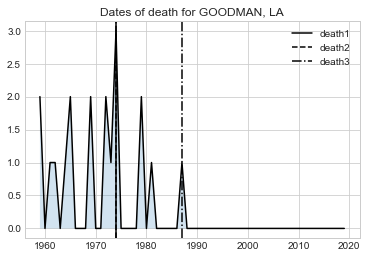

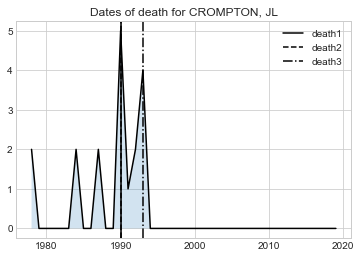

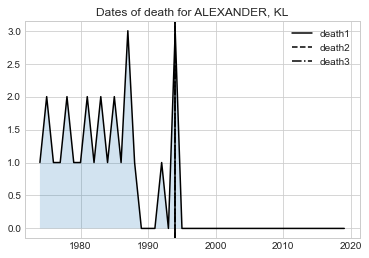

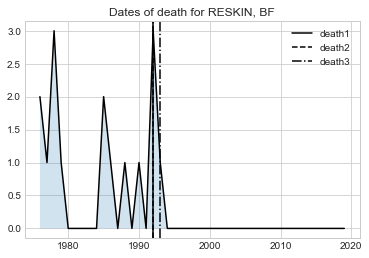

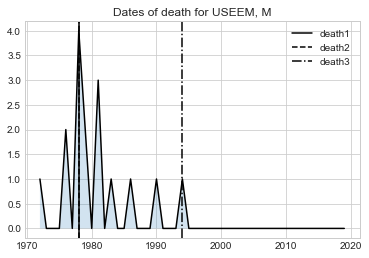

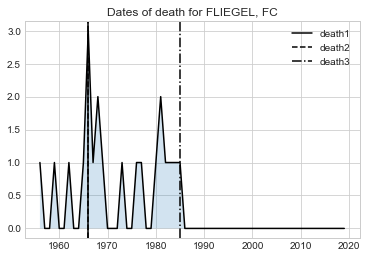

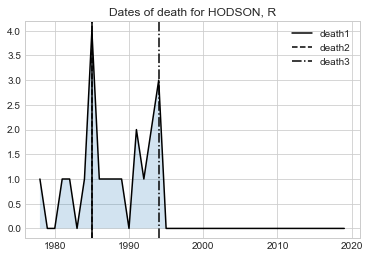

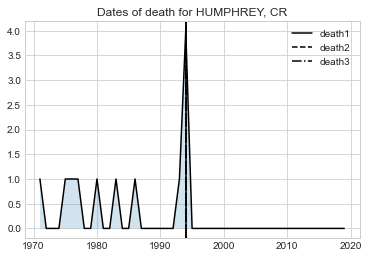

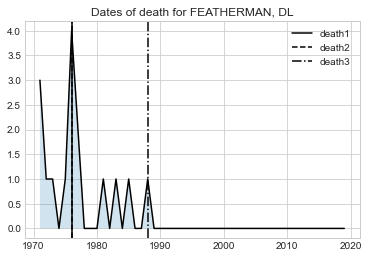

In [10]:
from random import random as rnd

linestyles = ['-', '--', '-.', ':']

for bg in bgs[:10]:

    years = range(bg['first'], 2020)
    plt.plot(
        years,
        [ docs['ay'][(bg['name'],y)] for y in years ],
        color='black'
    )
    plt.fill_between(
        years,
        [ 0 for y in years ],
        [ docs['ay'][(bg['name'],y)] for y in years ],
        alpha=0.2
    )

    for i,deathk in enumerate(deathks):
        plt.axvline(bg[deathk], 0, 10, label=deathk, color="black", linestyle=linestyles[i])

    plt.title("Dates of death for %s" % bg['name'])

    plt.legend();
    save_figure("%s.aysum_example_authordeath" % database_name)
    plt.show();